In [3]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

46212
45355
43671
41073
36699
32710
30862
35875
40677
43984
45734
46478
45342
42525
36829
31895
32145
37338
41882
45126
45904
45826
44665
43368
42030
39749
37698
35358
32535
30179
27522
24475
21357
19793
22938
25745
29027
32328
34598
36840
36804
35949
40112
34493
27747
26112
29160
31409
34457
36572
39013
40383
41807
41771
40186
38366
34552
30128
29830
34420
39623
42575
43853
40305
38249
35613
32167
30136
27631
29273
30940
32071
32724
32296
31411
29460
26673
30892
34917
38340
42111
43915
44612
44624
45697
42597
38824
35805
32805
31296
30108
29188
29183
30877
31419
31529
30634
28406
25581
22549
25935
29786
32812
35129
35806
29812
28777
32408
35425
37479
39246
40108
41088
40748
40262
39366
37522
34134
29227
31045
35603
39476
42495
45177
45674
44736
41762
42859
41942
41571
41054
40779
40832
40609
41086
40857
39167
37219
34734
31837
27484
23374
26750
30032
32709
34333
34499
38755
39678
41816
43687
44692
44743
44627
43779
42443
40331
38270
35441
31548
27197
27395
31164
33864
36444
37805
3845

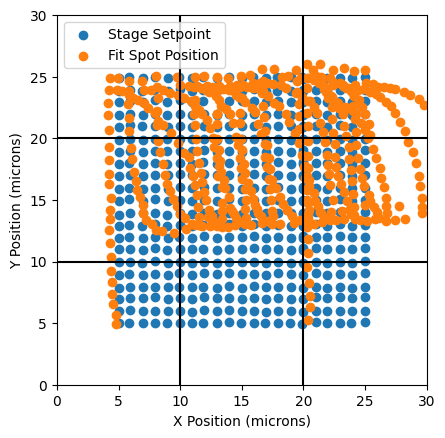

In [7]:
%matplotlib inline
# Load IPRF data for CMS, red filter
# data_folder = '/Users/layden/Documents/Image-Sensor-Testing/Intrapixel Response/IPRF Data/Grid Test Images/Corrected Pixels/10-17-24'
data_folder = '/Users/layden/Documents/Image-Sensor-Testing/Intrapixel Response/IPRF Data/Grid Test Images/10-19-24/Blue'
# See all of the files
files = os.listdir(data_folder)
files = [file for file in files if file.endswith('.fits')]
# Sort the files by the number that precedes .fits
files = sorted(files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
x_pos_array = np.zeros(len(files))
y_pos_array = np.zeros(len(files))
x_fit_array = np.zeros(len(files))
y_fit_array = np.zeros(len(files))
dark_value_array = np.zeros(len(files))
full_signal_array = np.zeros(len(files))
central_pix_fraction_array = np.zeros(len(files))
for i, file in enumerate(files[:]):
    # Load the fits file, print the spot position
    with fits.open(os.path.join(data_folder, file)) as hdul:
        data = hdul[0].data
        header = hdul[0].header
    x_stage_pos, y_stage_pos = header['X_POS'], header['Y_POS']
    x_fit_pos, y_fit_pos = 10 * (15 - header['X_FIT']), 10 * (15 - header['Y_FIT'])
    x_pos_array[i] = x_stage_pos + 5
    y_pos_array[i] = y_stage_pos + 5
    x_fit_array[i] = x_fit_pos + 5
    y_fit_array[i] = y_fit_pos + 5
    stacked_frame = np.sum(data, axis=0)
    dark_value = np.mean(stacked_frame[0:2])
    clean_frame = stacked_frame - dark_value
    full_signal = np.sum(clean_frame)
    central_pix_fraction = np.max(clean_frame) / full_signal
    dark_value_array[i] = dark_value
    full_signal_array[i] = full_signal
    central_pix_fraction_array[i] = central_pix_fraction
plt.scatter(x_pos_array, y_pos_array, label='Stage Setpoint')
plt.scatter(x_fit_array, y_fit_array, label='Fit Spot Position')
plt.ylim(0, 30)
plt.xlim(0, 30)
# Put lines showing pixel boundaries. Lines should be every 10 microns, so at -15, -5, 5, 15
plt.axvline(10, color='black')
plt.axvline(20, color='black')
plt.axhline(10, color='black')
plt.axhline(20, color='black')
# Make the aspect ratio equal
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.xlabel('X Position (microns)')
plt.ylabel('Y Position (microns)')
plt.show()

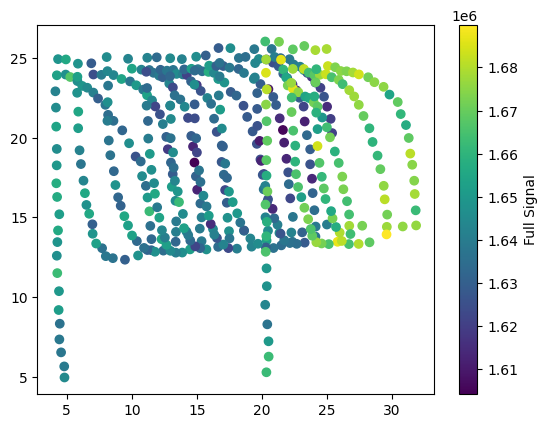

In [5]:
%matplotlib inline
# Color the scatter plot such that points with a higher full_signal value are 
# higher on the color scale
plt.scatter(x_fit_array, y_fit_array, c=full_signal_array, cmap='viridis')
plt.colorbar(label='Full Signal')
# plt.ylim(-5, 5)
# plt.xlim(-5, 5)
# for i in np.linspace(-5, 5, 8):
#     plt.axvline(i, color='black')
#     plt.axhline(i, color='black')
plt.show()

In [17]:
one_pix_x_fit_array = x_fit_array % 10 - 5
one_pix_y_fit_array = y_fit_array % 10 - 5

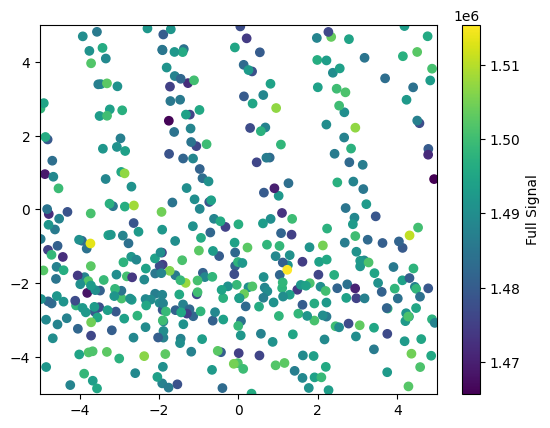

In [18]:
%matplotlib inline
# Color the scatter plot such that points with a higher full_signal value are 
# higher on the color scale
plt.scatter(one_pix_x_fit_array, one_pix_y_fit_array, c=full_signal_array, cmap='viridis')
plt.colorbar(label='Full Signal')
plt.ylim(-5, 5)
plt.xlim(-5, 5)
# for i in np.linspace(-5, 5, 8):
#     plt.axvline(i, color='black')
#     plt.axhline(i, color='black')
plt.show()

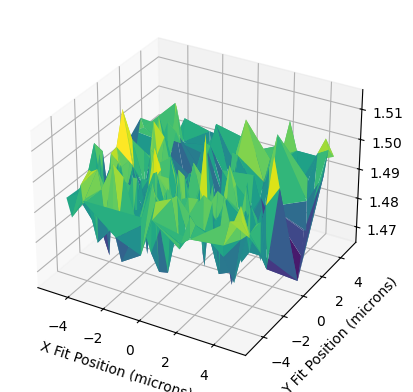

In [19]:
# Create a surface plot of the full signal value at each x_fit, y_fit position
%matplotlib inline
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_trisurf(one_pix_x_fit_array, one_pix_y_fit_array, full_signal_array, cmap='viridis', edgecolor='none')
surf = ax.plot_trisurf(one_pix_x_fit_array, one_pix_y_fit_array, full_signal_array, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Fit Position (microns)')
ax.set_ylabel('Y Fit Position (microns)')
# ax.set_zlim(0, 1e5)
# ax.set_zlabel('Full Signal Value')d
plt.show()

In [20]:
# Create a csv where column 1 are entries of one_pix_x_fit_array, column 2 are entries of one_pix_y_fit_array, and column 3 are entries of full_signal_array
import csv
with open('intrapixel_grid_data_nir_filter.csv', mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(['X Fit Position', 'Y Fit Position', 'Full Signal Value'])
    for i in range(len(one_pix_x_fit_array)):
        csv_writer.writerow([one_pix_x_fit_array[i], one_pix_y_fit_array[i], full_signal_array[i]])

: 